#### This code can visualize different channels of raw image and save them in the same file

In [1]:
from osgeo import gdal
import numpy as np
import cv2
import matplotlib.pyplot as plt
import imageio
import os

number of channel:  32
shape:  (32, 500, 500)


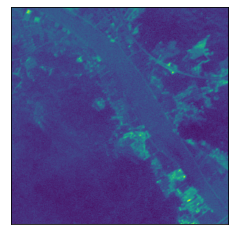

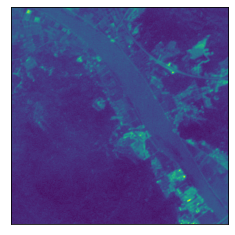

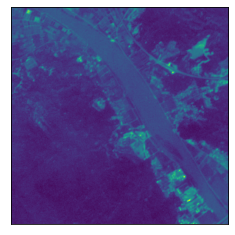

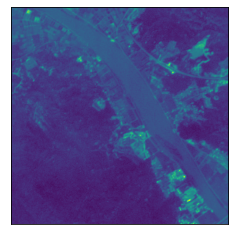

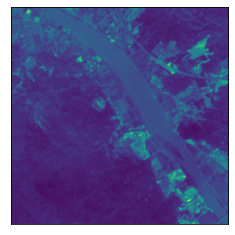

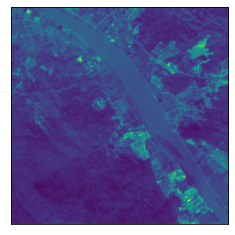

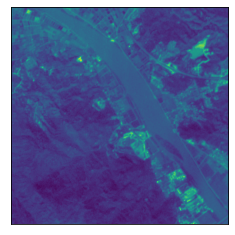

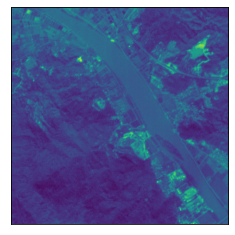

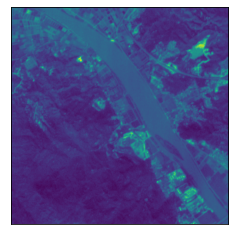

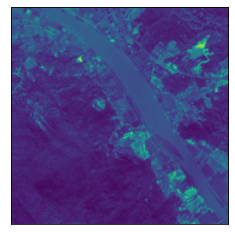

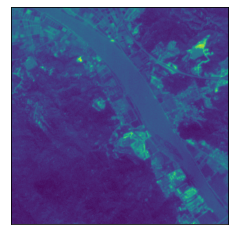

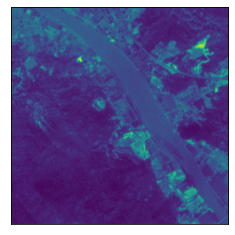

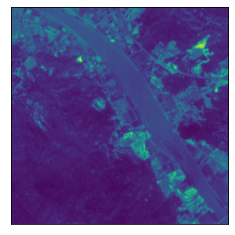

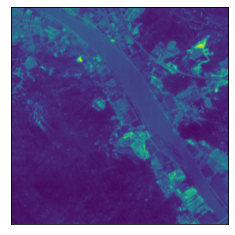

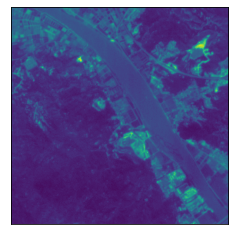

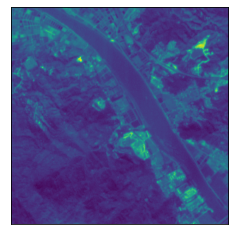

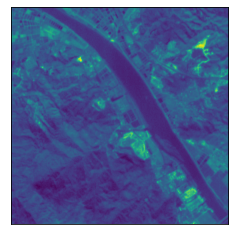

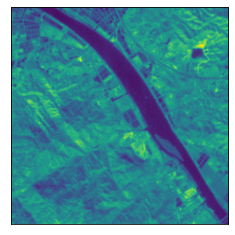

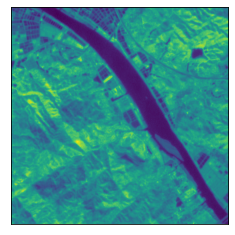

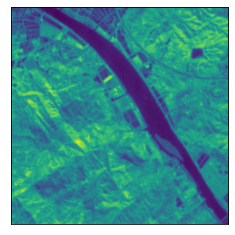

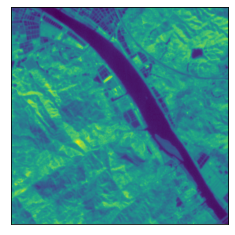

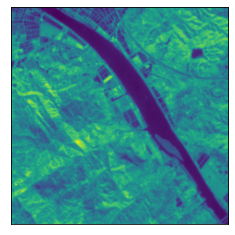

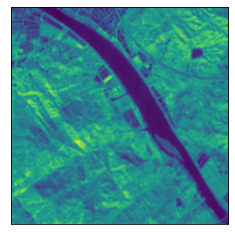

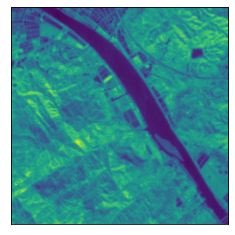

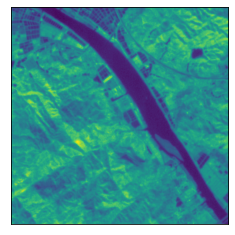

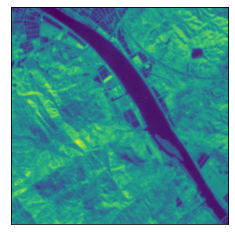

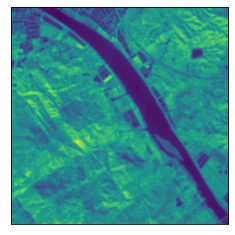

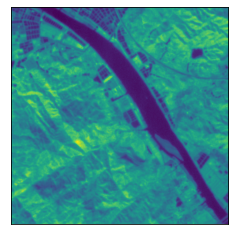

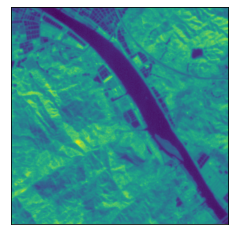

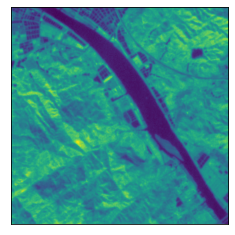

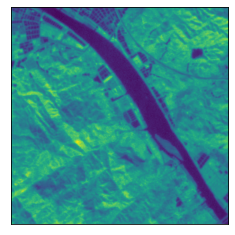

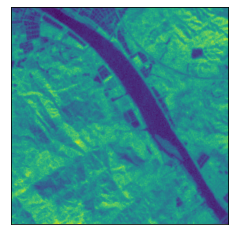

In [2]:
np.set_printoptions(threshold=np.inf)

# image PATH
dataset = gdal.Open("./comp/train/images/0089.tif")
# save PATH
save_path = "ori_img/"

cols=dataset.RasterXSize#length
rows=(dataset.RasterYSize)#width

xoffset=cols/2
yoffset=rows/2

n = []
for i in range(1,dataset.RasterCount+1):
    band = dataset.GetRasterBand(i)
    n.append(band.ReadAsArray(0,0, rows, cols))

def normalization(data):
    _range = np.max(data) - np.min(data)
    return (data - np.min(data)) / _range

print('number of channel: ',len(n))
for i in range(dataset.RasterCount):
    n[i]=normalization(n[i])
print('shape: ',np.array(n).shape)
for i in range(len(n)):
    img2=cv2.merge(n[i:i+1])
    plt.imshow(img2)
    plt.xticks([]),plt.yticks([]) # no axis
    plt.savefig("ori_img/" + str(i+1) + ".png", dpi = 300)
    plt.show()